In [1]:
import tweepy
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# write your comments

consumer_key = "G9DF5GheWj41pF2EOdL5voOfw"
consumer_secret = "PtHiSqoPErNafoSHWqTka6o4ccthug19u4NgQ4r9L6onFWngJ2"
access_token = "857530568-TbuDaZIq8waUZU2k5jwTVP8HAWeJQfNkOqEQ9FpL"
access_token_secret = "Uqvnibxc34fuLjWOYMg9cN6LkwRJmcHc7lzYUMmPlBWkQ"
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [3]:
help(tweepy.API)

Help on class API in module tweepy.api:

class API(builtins.object)
 |  API(auth_handler=None, host='api.twitter.com', search_host='search.twitter.com', upload_host='upload.twitter.com', cache=None, api_root='/1.1', search_root='', upload_root='/1.1', retry_count=0, retry_delay=0, retry_errors=None, timeout=60, parser=None, compression=False, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, proxy='')
 |  
 |  Twitter API
 |  
 |  Methods defined here:
 |  
 |  __init__(self, auth_handler=None, host='api.twitter.com', search_host='search.twitter.com', upload_host='upload.twitter.com', cache=None, api_root='/1.1', search_root='', upload_root='/1.1', retry_count=0, retry_delay=0, retry_errors=None, timeout=60, parser=None, compression=False, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, proxy='')
 |      Api instance Constructor
 |      
 |      :param auth_handler:
 |      :param host:  url of the server of the rest api, default:'api.twitter.com'
 |      :param sea

In [4]:
tweet = api.search(q="Coffee price", count = 100)

In [5]:
tweet_data = ""
sentiment=[]
for tw in tweet:
    tw = tw.text
    tw = re.sub('RT','',tw) # removing RT
    tw = re.sub('[@]+[a-zA-Z:_]+','',tw) # removing twitter handle
    tw = re.sub('[h]+[t]+[t]+[p]+[a-z0-9A-Z./:]+','',tw) # removing url
    print(tw)
    tweet_data = tweet_data+' '+tw
    tw = textblob.TextBlob(tw)
    if tw.sentiment.polarity>0.1:
        print("positive")
        sentiment.append("positive")
    elif tw.sentiment.polarity<-0.1:
        print("negative")
        sentiment.append("negative")
    else:
        print("Neutral")
        sentiment.append("neutral")
    print(" ")

Geometric Grid Sofa Slipcovers.
Available on Pre-order 
Color: Coffee only

Single Seater Cover:L54cm*W180cm
Price:… 
positive
 
  The price of coffee beans is at its lowest level in more than a decade, even though coffee has never been more popular. …
positive
 
Does someone want to explain to me why coffee shops charge extra for almond milk when it’s the same price—if not ch… 
Neutral
 
 10: Paid $6.90 for a coffee yesterday near Vic Park.... still unsure if I was suppose to get something else or that was the true pri…
positive
 
  Qatar is the 123 when it comes to freedom of press but number one on the highest price of coffee worldwide, and that’s all I…
Neutral
 
 Adding to the price argument, I don't find Starbucks pure black coffee particularly good either.
No… 
positive
 
  Cost of an espresso is double the price from a local cafe. The price of the other coffee concoctions are difficult to c…
negative
 
  Cost of an espresso is double the price from a local cafe. The price of th

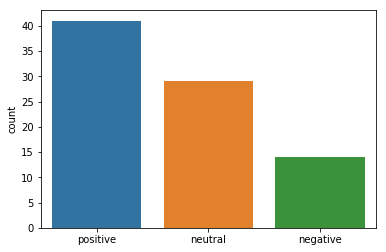

In [6]:
sns.countplot(sentiment)
plt.savefig('static/plot.jpg')
plt.show()

In [7]:
# pip install wordcloud
import wordcloud
wd = wordcloud.WordCloud(max_words=10).generate_from_text(tweet_data)

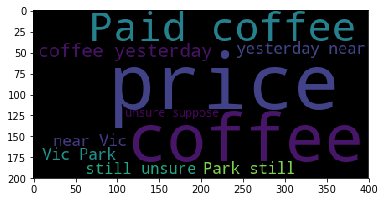

In [8]:
plt.imshow(wd)
plt.savefig('static/wordcloud.jpg')
plt.show()